In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from filters import Kalman, Kalman_Ensemble, Naive, Bootstrap_PT
from process import gen_process

import pandas as pd

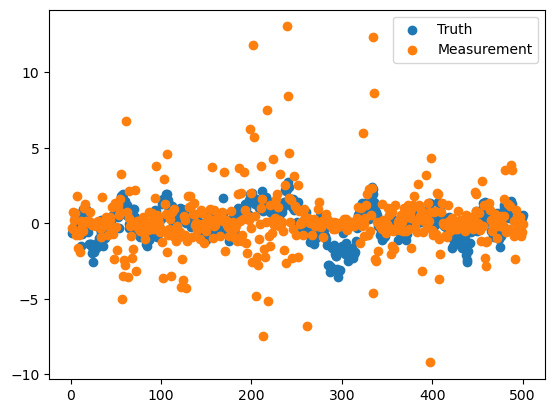

In [2]:
iters, u, y = gen_process(n = 500, linear = False)

plt.scatter(iters, u, label = "Truth")
plt.scatter(iters, y, label = "Measurement")
plt.legend()

In [3]:
data = pd.read_csv('synthetic_data.csv')
y_measurements = data['y'].to_numpy()

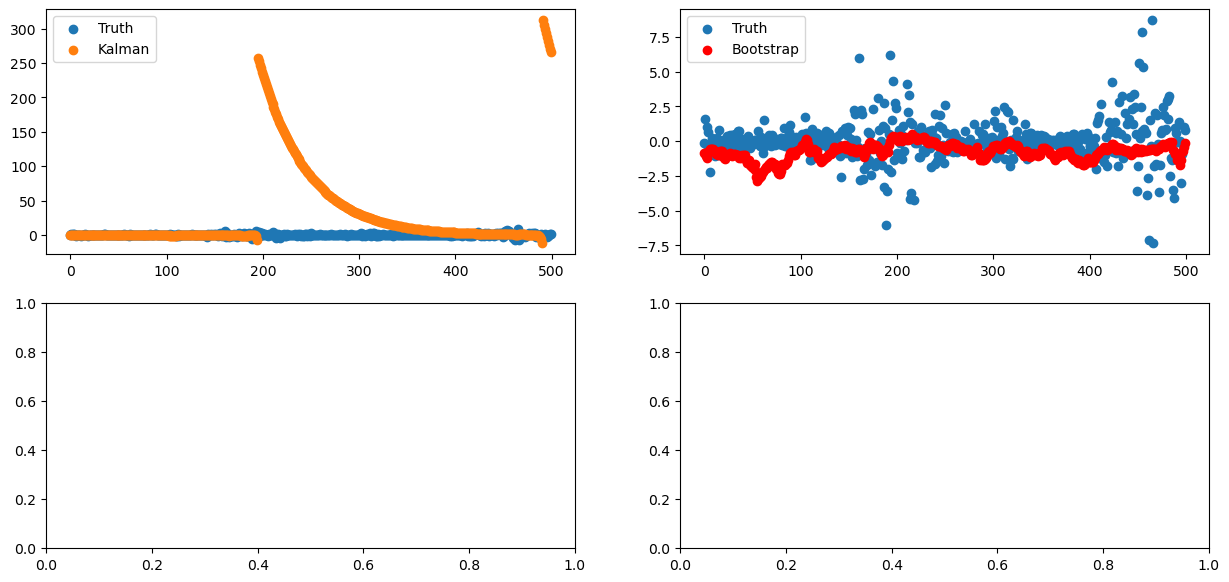

In [4]:
bootstrap = Bootstrap_PT(n = 10, linear = False)
Kalman_ensemble_filter = Kalman_Ensemble(n = 50, linear = False)

max_iters = 500 

for i in range(max_iters):

    Kalman_ensemble_filter.iterate(y_measurements[i])
    bootstrap.iterate(y_measurements[i])

fig, axes = plt.subplots(2,2, figsize = (15,7))

axes[0][0].scatter([i for i in range(max_iters)], y_measurements[:max_iters], label = "Truth")
axes[0][1].scatter([i for i in range(max_iters)], y_measurements[:max_iters], label = "Truth")

axes[0][0].scatter([i for i in range(max_iters)], Kalman_ensemble_filter.u_est_hist, label = "Kalman")
axes[0][1].scatter([i for i in range(max_iters)], bootstrap.u_est_hist, label = "Bootstrap", color = 'red')

axes[0][0].legend()
axes[0][1].legend()

#axes[1][0].scatter(iters[1:], bootstrap.ESS_hist)

In [34]:
grid = np.linspace(0,1,11)

grid_estimates = []
for phi in grid:

    current_estimates = []

    for j in range(10):
        
        bootstrap = Bootstrap_PT(n = 10, linear = False, phi = grid)

        for i in range(max_iters):
            bootstrap.iterate(y_measurements[i])

        current_estimates.append(bootstrap.loglikehood)
    
    grid_estimates.append(current_estimates)

results = {}

for i,pt in enumerate(grid):
    filtered = [el for el in grid_estimates[i] if np.isfinite(el)]
    key = np.round(pt, 2) 
    results[key] = filtered

c:\Users\mathi\Desktop\stochastic simulation\particleFilter\filters.py:179: RuntimeWarning: divide by zero encountered in log
  def update_loglikelihood(self, likelihoods):


In [35]:
for key in results.keys():
    print(results[key], '\n')

[-2404.9978840682925, -2297.292621511878, -1811.9483648614605, -2243.2912427170963, -2778.844417002201, -3252.9362394418686, -1124.2509369794336, -2008.3565128145049, -2082.580580304995, -1984.5545634067416] 

[-1343.388742530437, -2181.54895588944, -1586.8528006895476, -1864.0306758424338, -2250.800350472508, -1226.1982003149153, -1556.0185901387795, -1549.8398355396275, -1793.4688792517863, -1734.7196426137018] 

[-2089.5870605448686, -1049.1482732560314, -1769.7986892673305, -3386.304039884841, -1448.030604411529, -2517.523157924705, -3801.651043304636, -1988.5923521432624, -1347.7471732143565, -2222.3792610560276] 

[-1047.368284788019, -4430.542536282041, -1622.6623489537283, -3301.655033581237, -1225.7750788459766, -2255.803413417053, -1658.6428335216988, -1301.8023389939303, -3713.179645603449] 

[-2145.5607868464026, -2310.052176349568, -1789.1497490800477, -1868.7670038039944, -1366.7967374441353, -1099.0459242585407, -1301.6113985611644, -1605.1888588359323, -2013.75841517875

C:\Users\mathi\AppData\Local\Temp\ipykernel_30100\2122135750.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


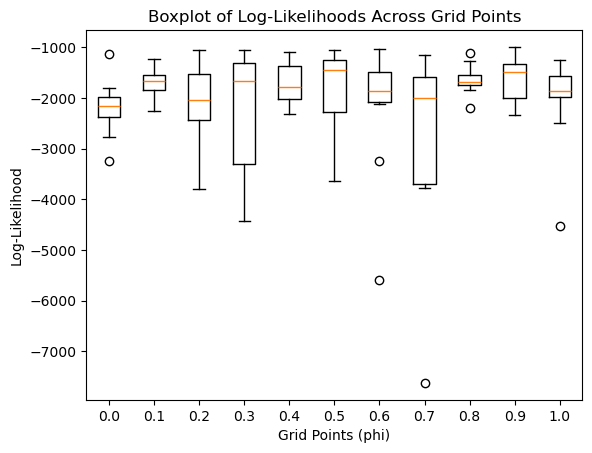

In [36]:
# Create a boxplot
plt.boxplot(results.values(), labels=results.keys())

# Add labels and title
plt.xlabel("Grid Points (phi)")
plt.ylabel("Log-Likelihood")
plt.title("Boxplot of Log-Likelihoods Across Grid Points")

# Show the plot
plt.show()    